# Linear Regression

## Princeton Salary Datasets

- In this task, we will study the impact of various factors (education, experience and gender) on salaries in academia.
- The dataset is a historic dataset of salaries in an academic department and is easy to study.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from patsy import dmatrices

/Users/alicevnix/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd
data = pd.read_csv("http://data.princeton.edu/wws509/datasets/salary.dat", sep ='\s+')


Note that we just downloaded a dataset from the Internet straight into `pandas`.

### Salary Distribution / Exploratory Analysis

As always, we start with exploring the dataset.

In [3]:
print (len(data), 'rows')
data.head(5)


52 rows


,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [4]:
data.dtypes


sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

/Users/alicevnix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ea05278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a16e2e898>]], dtype=object)

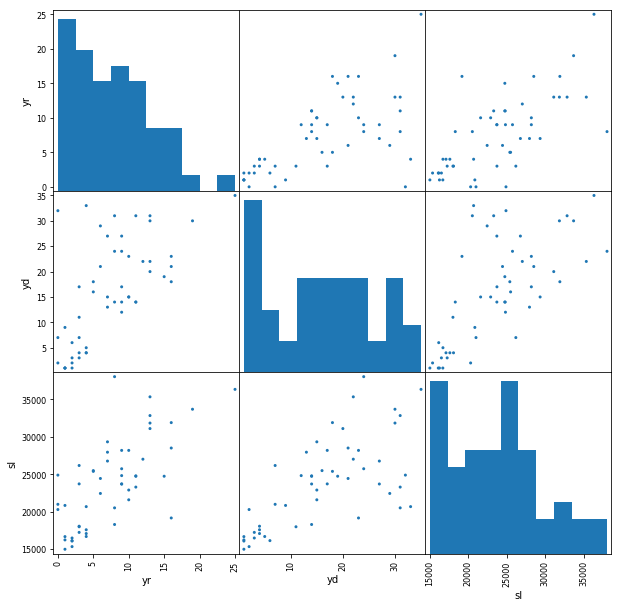

In [5]:
%matplotlib inline
import seaborn as sns
pd.scatter_matrix(data, figsize=(10,10), alpha = 1)


First note we only have 52 rows, which is very little.

As we can read on the [Princeton website](http://data.princeton.edu/wws509/datasets/#salary), these columns mean the following:
- sx = Sex: male or female,
- rk = Rank: full, associate or assistant professor,
- yr = Number of years in current rank,
- dg = Highest degree: doctorate or masters,
- yd = Number of years since highest degree was earned,
- sl = Academic year salary, in dollars.

One of our initial questions is what the distributon of salaries is.

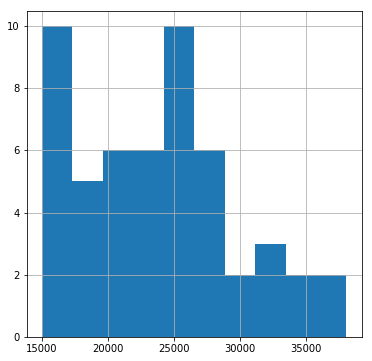

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
f = data.sl.hist(bins=10, figsize=(6,6))


### What correlates with salary?

Next, we would want to know what factors may be correlated with salary.  We would expect that as experience or education increases, the salary should increases as well.

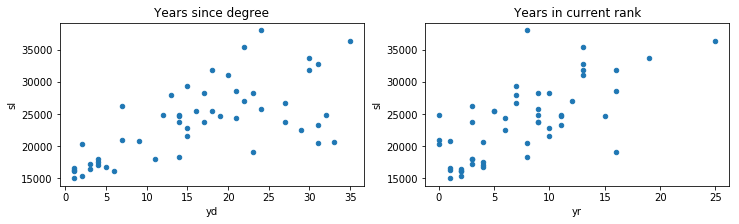

In [7]:
fig, axes = plt.subplots(ncols=2) 
f = data.plot(kind='scatter', x='yd', y='sl', ax=axes[0], title="Years since degree", figsize=(12,3))
f = data.plot(kind='scatter', x='yr', y='sl', ax=axes[1], title="Years in current rank")


Most importantly, while using **linear** regression, we should see if the relationship is **linear**.  Does every increase in X lead to a constant increase in Y?  We may expect for the first 5-10 year of experience this true, but perhaps after 10 year the salaries stop increasing or jump dramatically.  Linear regression would be unable to capture these nonlinearaties. 

## Example Code

In [8]:
# Training and evaluating a model - from the Sklearn module

model = LinearRegression()
X, y = data[['yr']], data.sl #features are our X and y or our target is sl or 'salary'
model.fit(X, y)
model.score(X, y)  # for regression, this is R2

0.49093702676921624

In [9]:
# Interaction effects from Patsy module
# sx*rk is sex * rank for our interaction term and C(yr) creates our dummy variables for year 
y, X = dmatrices("sl ~ sx*rk + C(yr)", data=data, return_type='dataframe') #Wrapping in C() makes it categorical
X

,Intercept,sx[T.male],rk[T.associate],rk[T.full],C(yr)[T.1],C(yr)[T.2],C(yr)[T.3],C(yr)[T.4],C(yr)[T.5],C(yr)[T.6],...,C(yr)[T.10],C(yr)[T.11],C(yr)[T.12],C(yr)[T.13],C(yr)[T.15],C(yr)[T.16],C(yr)[T.19],C(yr)[T.25],sx[T.male]:rk[T.associate],sx[T.male]:rk[T.full]
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Mean salary for males and females
data.groupby('sx').sl.mean()


sx
female    21357.142857
male      24696.789474
Name: sl, dtype: float64

In [11]:
# Test data validation and specify that our train_size is 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [12]:
X_train.count()


Intercept                     41
sx[T.male]                    41
rk[T.associate]               41
rk[T.full]                    41
C(yr)[T.1]                    41
C(yr)[T.2]                    41
C(yr)[T.3]                    41
C(yr)[T.4]                    41
C(yr)[T.5]                    41
C(yr)[T.6]                    41
C(yr)[T.7]                    41
C(yr)[T.8]                    41
C(yr)[T.9]                    41
C(yr)[T.10]                   41
C(yr)[T.11]                   41
C(yr)[T.12]                   41
C(yr)[T.13]                   41
C(yr)[T.15]                   41
C(yr)[T.16]                   41
C(yr)[T.19]                   41
C(yr)[T.25]                   41
sx[T.male]:rk[T.associate]    41
sx[T.male]:rk[T.full]         41
dtype: int64

In [13]:
X_test.count()


Intercept                     11
sx[T.male]                    11
rk[T.associate]               11
rk[T.full]                    11
C(yr)[T.1]                    11
C(yr)[T.2]                    11
C(yr)[T.3]                    11
C(yr)[T.4]                    11
C(yr)[T.5]                    11
C(yr)[T.6]                    11
C(yr)[T.7]                    11
C(yr)[T.8]                    11
C(yr)[T.9]                    11
C(yr)[T.10]                   11
C(yr)[T.11]                   11
C(yr)[T.12]                   11
C(yr)[T.13]                   11
C(yr)[T.15]                   11
C(yr)[T.16]                   11
C(yr)[T.19]                   11
C(yr)[T.25]                   11
sx[T.male]:rk[T.associate]    11
sx[T.male]:rk[T.full]         11
dtype: int64

The quality of a linear regression fit is typically assessed using two related quantities: the residual standard error (RSE) and the R2 statistic.  The R2 statistic provides an alternative measure of fit. It takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between 0 and 1, and is independent of the scale of Y.  R2 measures the proportion of variability in Y that can be explained using X. An R2 statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response; However, it can still be challenging to determine what is a good R2 value, and in general, this will depend on the application (An Introduction to Statistical Learning).

### In Class Exercises with Partner

- 1) Simple linear regression: Use sklearn to fit the model using a single variable (years of experience).
  - What is the R^2?
  - What is the formula for the line (e.g. salary = 880 \* years_of_experience + 10000)?
  - Plot the linear model using seaborn
  - What is the impact of years of experience on salary? Write a 2 sentence description that is understandable to a non-technical audience
- 2) Multiple linear regression. Improve the model by adding additional features (e.g. years since degree, gender, highest degree?)
  - What is the R^2? Evaluate on the test set (data that you did not train with) so that you can reduce the chances that you are overfitting
  - Add an interaction effect using  (e.g. gender / rank)
  - Using the regression output, answer the question, "does gender have an impact on the academic's salary?"

In [211]:
# Below we implement Sklearn and build a regression model for ML and prediction

In [29]:
model2 = LinearRegression()
X, y = data[['yr']], data.sl
model.fit(X, y)
model.score(X, y)


0.49093702676921624

R2 is approximately 50% in our first model

In [30]:
model.coef_


array([ 752.79775742])

In [31]:
slope = model.coef_

In [32]:
inter = model.intercept_

In [33]:
y, X = dmatrices("sl ~ yr", data=data, return_type='dataframe') 
X

,Intercept,yr
0,1.0,25.0
1,1.0,13.0
2,1.0,10.0
3,1.0,7.0
4,1.0,19.0
5,1.0,16.0
6,1.0,0.0
7,1.0,16.0
8,1.0,13.0
9,1.0,13.0


In [34]:
model2 = LinearRegression()
X, y = data[['yr', 'yd']], data.sl
model.fit(X, y)
model.score(X, y)


0.5782019226431887

In [41]:
dummies = pd.get_dummies(data["sx"])
# Add to the original dataframe
data = pd.concat([data, dummies], axis=1)
data.head()


,sx,rk,yr,dg,yd,sl,female,male,female,male,female,male,female,male,doctorate,masters,female,male
0,male,full,25,doctorate,35,36350,0,1,0,1,0,1,0,1,1,0,0,1
1,male,full,13,doctorate,22,35350,0,1,0,1,0,1,0,1,1,0,0,1
2,male,full,10,doctorate,23,28200,0,1,0,1,0,1,0,1,1,0,0,1
3,female,full,7,doctorate,27,26775,1,0,1,0,1,0,1,0,1,0,1,0
4,male,full,19,masters,30,33696,0,1,0,1,0,1,0,1,0,1,0,1


In [40]:
dummies = pd.get_dummies(data["dg"])
# Add to the original dataframe
data = pd.concat([data, dummies], axis=1)
data.head()


,sx,rk,yr,dg,yd,sl,female,male,female,male,female,male,female,male,doctorate,masters
0,male,full,25,doctorate,35,36350,0,1,0,1,0,1,0,1,1,0
1,male,full,13,doctorate,22,35350,0,1,0,1,0,1,0,1,1,0
2,male,full,10,doctorate,23,28200,0,1,0,1,0,1,0,1,1,0
3,female,full,7,doctorate,27,26775,1,0,1,0,1,0,1,0,1,0
4,male,full,19,masters,30,33696,0,1,0,1,0,1,0,1,0,1


In [42]:
model2 = LinearRegression()
X, y = data[['yr', 'yd', 'doctorate', 'masters', 'male', 'female' ]], data.sl
model.fit(X, y)
model.score(X, y)


0.63115975029074345

In [36]:
import seaborn as sns

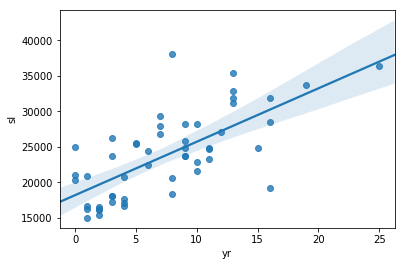

In [37]:
sns.regplot(x="yr", y="sl", data=data);


In [231]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [232]:
model1 = smf.ols('sl ~ yr', data=data).fit()


In [233]:
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     48.22
Date:                Sat, 06 Jan 2018   Prob (F-statistic):           7.34e-09
Time:                        19:33:01   Log-Likelihood:                -507.38
No. Observations:                  52   AIC:                             1019.
Df Residuals:                      50   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.817e+04   1003.658     18.100      0.0

Since our p-value is <.05 we can conclude that years of experience does have an effect on salary.  In other words, there is an association or relationship between having several years of experience and a higher salary.   

In [234]:
model3 = smf.ols('sl ~ yr + yd + C(sx) + C(dg)', data=data).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     20.11
Date:                Sat, 06 Jan 2018   Prob (F-statistic):           1.05e-09
Time:                        19:33:07   Log-Likelihood:                -499.00
No. Observations:                  52   AIC:                             1008.
Df Residuals:                      47   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.59e+04   1259.866  

R2 (coefficient of determination) is ~63% in our new model

In [238]:
model4 = smf.ols('sl ~ yr + yd + C(sx) + C(dg) + C(sx) * C(rk)', data=data).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     33.32
Date:                Sat, 06 Jan 2018   Prob (F-statistic):           5.22e-16
Time:                        19:50:12   Log-Likelihood:                -473.61
No. Observations:                  52   AIC:                             965.2
Df Residuals:                      43   BIC:                             982.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [239]:
model5 = smf.ols('sl ~ C(sx)', data=data).fit()
print (model5.summary())


                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.413
Date:                Sat, 06 Jan 2018   Prob (F-statistic):             0.0706
Time:                        19:52:40   Log-Likelihood:                -523.22
No. Observations:                  52   AIC:                             1050.
Df Residuals:                      50   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.136e+04   1545.326     13.820

Since our (p-value = 0.07) we can conclude that sex (male,female) does not have an effect on salary. In other words, there is not an association or relationship between being male or female and salary. 

In [225]:
data.dtypes


sx        object
rk        object
yr         int64
dg        object
yd         int64
sl         int64
female     uint8
male       uint8
dtype: object

In [108]:
# Available models for statsmodels package
dir(smf)


['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PHReg',
 'Poisson',
 'Probit',
 'QuantReg',
 'RLM',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'gee',
 'glm',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

### Further reading

- [Linear Regression with Python](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
- [Statsmodels Documentation](http://statsmodels.sourceforge.net/stable/index.html)
- [Python 538 Model](https://github.com/jseabold/538model)

<hr>

#### Boston Housing Price Exercises

In this exercise, we'll use one of sklearn's standard datasets to analyze Boston house prices.

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
features = boston.feature_names
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model


In [7]:
print (boston)



{'data': array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]), 'target': array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.

In [9]:
boston1 = pd.DataFrame(boston.data, columns=boston.feature_names)
boston1['price'] = boston.target #Dependent variable or output variable

In [10]:
boston1.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston1.shape



(506, 14)

In [13]:
import seaborn as sns

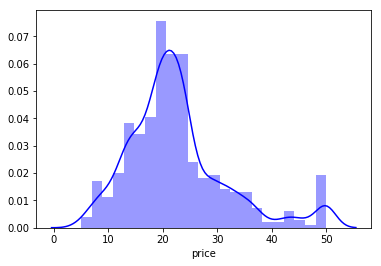

In [14]:
# Quick plot of the data using seaborn
sns.distplot (boston1['price'], None, color='blue')



In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Use The natural logarithm or log which is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.

#1. Define Data
X = boston1[['RAD', 'RM']]
Y= np.log(boston1.price)

#2. Train Data, Test Data, Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

#3. Fit the Model
model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

#4. Metric
mean_absolute_error(Y_test, Y_pred)



0.17151099907667203

In [16]:

X = boston1[['RAD', 'RM']]
Y= (boston1.price)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

mean_absolute_error(Y_test, Y_pred)


3.6407784055721759

In [17]:
X = boston1[['RAD', 'RM']]
Y= np.log(boston1.price)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

mean_squared_error(Y_test, Y_pred)


0.0792555921005801

In [119]:
X = boston1[['RAD', 'RM']]
Y= (boston1.price)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

mean_squared_error(Y_test, Y_pred)


54.422798135706955

In [18]:
X = boston1[['RAD', 'RM']]
Y= (boston1.price)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

r2_score(Y_test, Y_pred)


0.65932524639192658

In [118]:
X = boston1[['RAD', 'RM']]
Y= np.log(boston1.price)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

r2_score(Y_test, Y_pred)

0.46912455561411281

In [20]:
boston1.head


<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  

In [21]:
y = (boston1.price)


In [22]:
y = np.log(boston1.price)


In [23]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)


1.1679323235 [-0.01715513  0.32307399]


- Let's make a histogram of all house prices in the dataset. 
- It's a little unclear in what units the prices are, let's assume it's in $K.

In [29]:
# Examples of OLS Regression using Statsmodels package

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf


In [30]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data


In [31]:
dat.head(5)


,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [32]:
dat.columns


Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

In [33]:
# Fit regression model (using the natural log of one of the regression coefficients)

results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()


In [34]:
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 07 Jan 2018   Prob (F-statistic):           1.90e-08
Time:                        20:50:54   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     